# Assignment #3


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** xxxx/xx/xx 23:59
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in red and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: [https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models](https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models)

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)


---



Fill your information here & run the cell

In [36]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id =  95521396#@param {type:"integer"}
student_name = "Danial Kamali" #@param {type:"string"}
Your_Github_account_Email = "daniel.kamali@yahoo.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg03')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521396
your name: Danial Kamali


# Transfer learning warm up

Pre-trained networks are networks that are already trained and stored using a lot of data. We use these networks because:
- Our data is usually not very large.
- We do not need to start the training process from scratch.


Usually, first layers in deep networks extract general features, and as we move forward in the layers, the network learns patterns more specific to the task. So if we freeze the first layers and update the weights of the last layers according to your data, the network can better learn the patterns in our data for a particular task in less time and using relatively low data.

We now want to separate ambulance classes and ordinary cars using the VGG network. To do this, we use the data you generated for the previous assignment. You must generate those data in this assignment again and split the dataset into train and test.


In [37]:
!pip install google_images_download
!apt update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import cv2
from google_images_download import google_images_download   #importing the library

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 163 kB in 3s (61.9 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state in

In [38]:

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"ambulance","limit":200,"format":"jpg","image_directory":"allowed","size":">800*600","chromedriver":'/usr/lib/chromium-browser/chromedriver'}   #creating list of arguments

bus_paths = response.download(arguments)   #passing the arguments to the function


Item no.: 1 --> Item name = ambulance
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.Dunkirk-Medix-Ambulance-1.jpg
Completed Image ====> 2.2016_Fiat_Ducato_42_Maxi_West_Midlands_Ambulance_Service_3.0.jpg
Completed Image ====> 3.blogambulance.jpg
Completed Image ====> 4.5de1b1d3237ac.image.jpg
Completed Image ====> 5.SN850970.JPG
Completed Image ====> 6.1-American%20Ambulance.jpg
Completed Image ====> 7.rawImage.jpg
Completed Image ====> 8.324632632.jpeg.jpg
Completed Image ====> 9.KW6I7VGNCAW5ZASSZIHJB6ES3M.jpg
Completed Image ====> 10.LJ58OJX_LONDON_AMBULANCE_QUEEN_VICTORIA_STREET_CITY_OF_LONDON_%2826124592264%29.jpg
Wrong image format returned. Skipping...
Completed Image ====> 11.Ambulance-1-1.jpg
Completed Image ====> 12.3836942_0001-Electronic-Presentation.jpg
Completed Image ====> 13.ambulance.jpg
Completed Image ====> 14.care-speedway_orig.jpg
Completed Image ====> 15.5de1b1d38b428.imag

In [39]:
response = google_images_download.googleimagesdownload()   #class instantiation
arguments1 = {"keywords":"car in street","limit":200,"image_directory":"not_allowed","format":"jpg","type":"photo","chromedriver":'/usr/lib/chromium-browser/chromedriver'}   #creating list of arguments
car_paths = response.download(arguments1)   #passing the arguments to the function




Item no.: 1 --> Item name = car in street
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.17850525_web1_M1-Brief-Marysville-Crash-edh-190726.jpg
Completed Image ====> 2.drivers-park-car-in-middle-of-street-to-avoid-alternate-side-tickets.jpg
Completed Image ====> 3.how_far_away_must_you_park_from_a_driveway_800x450-1.jpg
Completed Image ====> 4.62bddd2a-89ab-11e7-8a03-f21d91374892-780x429.jpg
Completed Image ====> 5.Google_Street_View_Car_in_Aranjuez.jpg
Completed Image ====> 6.many-car-street-15244647.jpg
Completed Image ====> 7.applemapslavehiclebi-800x543.jpg
Completed Image ====> 8.18502939_web1_190913-sfe-tenderloincollision-001.jpg
Completed Image ====> 9.JS137424394.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> 10.Google_Street_View_Car_in_Honolulu.jpg
Completed Image ====> 11.20180808%20-%20Zipcar%20Carshare%20Pilot%20N12th%20and%20

In [0]:
import os
base_dir = '/content/downloads/'
def load_images(category):
  path = base_dir+category+"/"
  images_path = os.listdir(path)
  images = []
  for image in images_path:
    img = cv2.imread(path+image)
    try:
      img = cv2.resize(img, (224, 224))
    except:
      continue
    images.append(img)
  return images
allowed = load_images('allowed')
not_allowed = load_images('not_allowed')

In [0]:
images = {'train': allowed[:50]+not_allowed[:50], 'test': allowed[50:]+not_allowed[50:]} # Put the images here
labels = {'train': [1]*len(allowed[:50]) + [0]*len(not_allowed[:50]) , 'test': [1]*len(allowed[50:])+[0]*len(not_allowed[50:])} # Put the labels here

	
Now at first, we need to declare a VGG modal to extract the image features. You can see the structure and layers of the network below.
A pre-trained model can extract the features of an image itself. So at first, please do this classification task just with Features extracted from the VGG model.

In [42]:
from keras.applications import VGG16
import numpy as np
from keras.applications.vgg16 import preprocess_input
vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_model.summary()

def preprocess_image(img):
  return preprocess_input(img)
xs = {'train': [], 'test': []}
for image in images['train']:
  img = image
  img = np.expand_dims(img, axis=0)
  img = preprocess_image(img)
  features = vgg16_model.predict(img)
  ff = features.flatten()
  xs['train'].append(ff)

  # xs['train'].append(features)

for image in images['test']:
  img = image
  img = np.expand_dims(img, axis=0)
  img = preprocess_image(img)
  features = vgg16_model.predict(img)
  ff = features.flatten()
  xs['test'].append(ff)
  # print(np.array(ff.tolist()).shape)
  # xs['test'].append(features)

ys = {'train': [], 'test': []}
ys['train'] = np.array(labels['train'][:])
ys['test'] = np.array(labels['test'][:])


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [43]:
ys['train'].reshape((1,100))
# print(x['train'][0].shape)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Finally, implement a simple Keras model to the classification of these images.

In [44]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu',input_shape=(np.array(xs['train']).shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy"])
              
              # metrics=["accuracy",f1,recall,precision,metrics.binary_accuracy])
model.summary()
model.fit(np.array(xs['train']), ys['train'], epochs=100, batch_size=20)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 6,464,001
Trainable params: 6,464,001
Non-trainable params: 0
___________________________________________

In [45]:
scores = model.evaluate(np.array(xs['test']),np.array(ys['test']))
for i in range(len(scores)):
  print(str(list(model.metrics_names)[i])+" : "+ str(scores[i]))


464/464 [==============================] - 0s 911us/step
loss : 0.9009065863809916
acc : 0.9030172413793104


Next, you need to do this task with fine-tuned model. How many layers of model do you think you need to update according to your data?

Now implement fine-tuning on the model and repeat classifying data with the same model as the previous part. 

In [46]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

# vgg16_model = VGG16(weights='imagenet', include_top=False)
# model1 = models.Sequential()
# model1.add(vgg16_model)
# model1.add(layers.Flatten())
# model1.add(layers.Dense(128, activation='relu'))
# model1.add(layers.Dense(64, activation='relu'))
# model1.add(layers.Dense(1, activation='sigmoid'))

conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))



model3.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=["accuracy"])
model3.fit(np.array(images['train']), ys['train'], epochs=100, batch_size=20)
scores = model3.evaluate(np.array(images['test']),np.array(ys['test']))
for i in range(len(scores)):
  print(str(list(model3.metrics_names)[i])+" : "+ str(scores[i]))

  ########################################
  #     Put your implementation here     #
  ########################################


Epoch 1/100
100/100 [==============================] - 3s 31ms/step - loss: 2.4014 - acc: 0.6800
Epoch 2/100
100/100 [==============================] - 2s 15ms/step - loss: 0.6341 - acc: 0.9000
Epoch 3/100
100/100 [==============================] - 2s 15ms/step - loss: 0.2045 - acc: 0.9700
Epoch 4/100
100/100 [==============================] - 2s 15ms/step - loss: 0.0060 - acc: 1.0000
Epoch 5/100
100/100 [==============================] - 2s 15ms/step - loss: 8.2784e-05 - acc: 1.0000
Epoch 6/100
100/100 [==============================] - 2s 15ms/step - loss: 7.1882e-05 - acc: 1.0000
Epoch 7/100
100/100 [==============================] - 2s 15ms/step - loss: 6.2492e-05 - acc: 1.0000
Epoch 8/100
100/100 [==============================] - 2s 15ms/step - loss: 5.3936e-05 - acc: 1.0000
Epoch 9/100
100/100 [==============================] - 2s 15ms/step - loss: 4.6836e-05 - acc: 1.0000
Epoch 10/100
100/100 [==============================] - 2s 16ms/step - loss: 4.0217e-05 - acc: 1.0000
Epoch

# 1. Multi objective Sequence to Sequence model

Remember the **Transfer Learning and Sequence to Sequence Model** practical class; you learned how to use a pre-trained model, and how to train a sequence to sequence model. In this task, you are going to build a sequence to sequence model by feeding English characters into your model and predicting French and Persian characters. There are some criteria that you must consider:
1. You have learned about building a character level sequence to sequence model in the [practical class](https://iust-deep-learning.github.io/981/practical/). You can review the full instruction and the code [here](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html) (We suggest practicing with [this](https://colab.research.google.com/drive/1LS0jeq6glTKoY7zRyQBvbBHmH-jKowZO) notebook before jumping to the answer). For your homework, you must implement a character-level multi-objective sequence to sequence model, which translates English texts to French and Persian Simultaneously. You can learn about building neural networks with multiple outputs [here](https://sanjayasubedi.com.np/deeplearning/multioutput-keras/).  

2. After training the model, you **must** use the prediction and test some samples, as it was provided in your practical class notebook.

3. You **must** use the dataset which was used in your practical class. For Persian translation, you must translate it from the English part by using any translation APIs such as [Google Translate](https://cloud.google.com/translate/docs/).

4. Remember saving all of your trained models under the path 'ASSIGNMENT_PATH /'.


In [68]:
!wget http://www.manythings.org/anki/fra-eng.zip
!sudo apt-get install unzip
!unzip fra-eng.zip
%rm fa.txt
!wget https://raw.githubusercontent.com/iamdanialkamali/iust-deep-learning-assignments/master/fa.txt
!ls

--2019-12-29 10:40:01--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.109.196, 104.24.108.196, 2606:4700:30::6818:6cc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.109.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5800008 (5.5M) [application/zip]
Saving to: ‘fra-eng.zip.1’

fra-eng.zip.1       100%[===================>]   5.53M  1.26MB/s    in 4.4s    

2019-12-29 10:40:06 (1.26 MB/s) - ‘fra-eng.zip.1’ saved [5800008/5800008]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Archive:  fra-eng.zip
replace _about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: _about.txt 

In [48]:
'''
#Sequence to sequence example in Keras (character-level).

This script demonstrates how to implement a basic character-level
sequence-to-sequence model. We apply it to translating
short English sentences into short French sentences,
character-by-character. Note that it is fairly unusual to
do character-level machine translation, as word-level
models are more common in this domain.

**Summary of the algorithm**

- We start with input sequences from a domain (e.g. English sentences)
    and corresponding target sequences from another domain
    (e.g. French sentences).
- An encoder LSTM turns input sequences to 2 state vectors
    (we keep the last LSTM state and discard the outputs).
- A decoder LSTM is trained to turn the target sequences into
    the same sequence but offset by one timestep in the future,
    a training process called "teacher forcing" in this context.
    It uses as initial state the state vectors from the encoder.
    Effectively, the decoder learns to generate `targets[t+1...]`
    given `targets[...t]`, conditioned on the input sequence.
- In inference mode, when we want to decode unknown input sequences, we:
    - Encode the input sequence into state vectors
    - Start with a target sequence of size 1
        (just the start-of-sequence character)
    - Feed the state vectors and 1-char target sequence
        to the decoder to produce predictions for the next character
    - Sample the next character using these predictions
        (we simply use argmax).
    - Append the sampled character to the target sequence
    - Repeat until we generate the end-of-sequence character or we
        hit the character limit.

**Data download**

[English to French sentence pairs.
](http://www.manythings.org/anki/fra-eng.zip)

[Lots of neat sentence pairs datasets.
](http://www.manythings.org/anki/)

**References**

- [Sequence to Sequence Learning with Neural Networks
   ](https://arxiv.org/abs/1409.3215)
- [Learning Phrase Representations using
    RNN Encoder-Decoder for Statistical Machine Translation
    ](https://arxiv.org/abs/1406.1078)
'''
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np

batch_size = 64  # Batch size for training.
epochs = 10  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'fra.txt'
farsi_path = 'fa.txt'
!ls

_about.txt  asg03  downloads  fa.txt  fra-eng.zip  fra.txt  sample_data


In [49]:
# Vectorize the data.
input_file = open(data_path).readlines()[:num_samples]
farsi_file = open(farsi_path).readlines()[:num_samples]
english_texts = [i.split('\t')[0].strip() for i in input_file  ]
farsi_texts = ["\t" + i.strip() + "\n" for i in farsi_file  ]
french_texts = ["\t" + i.split('\t')[1].strip() + "\n" for i in input_file]
english_characters = set()
french_characters = set()
farsi_characters = set()
[[english_characters.add(j) for j in list(i) ]for i in english_texts]
[[french_characters.add(j) for j in list(i) ]for i in french_texts]
[[farsi_characters.add(j) for j in list(i) ]for i in farsi_texts]
num_english_tokens = len(english_characters)
num_french_decoder_tokens = len(french_characters)
num_farsi_decoder_tokens = len(farsi_characters)
max_english_seq_length = len(english_texts[-1])
max_french_decoder_seq_length = max(list(map(len,french_texts)))
max_farsi_decoder_seq_length = max(list(map(len,farsi_texts)))
print(english_characters)

{'W', 'j', 'S', 'a', 'm', 'D', 'O', 'Y', '5', 'b', '6', 'u', 'T', 'c', 'f', 'E', "'", 'N', '&', ':', '?', 'r', ' ', 'i', 'h', '$', 'g', 'V', 'L', 'B', 'v', 'M', 'H', 't', 'k', 'U', 'q', '3', 'y', 'w', 'C', 'p', ',', 'P', 'e', '-', '9', '0', 'o', 'z', 'd', 'R', 's', 'G', 'J', 'x', '.', 'l', 'K', '8', '2', '%', 'F', 'I', '7', '1', 'n', 'Q', '!', 'A'}


In [0]:
english_token_index = dict(
    [(char, i) for i, char in enumerate(english_characters)])
french_target_token_index = dict(
    [(char, i) for i, char in enumerate(french_characters)])
farsi_target_token_index = dict(
    [(char, i) for i, char in enumerate(farsi_characters)])

w = [[english_token_index[char]  for char in list(word) ] for word in english_texts]
f = []
for word in w :
  www = [[0]* num_english_tokens]*max_english_seq_length
  for i,char in enumerate(word):
    ww = [0]* num_english_tokens
    ww[char] = 1
    www[i] = np.array(ww[:])
  f.append(np.array(www[:]))
english_input_data = np.array(f)

w = [[french_target_token_index[char]  for char in list(word)[:-1] ] for word in french_texts]
f = []
for word in w :
  www = [[0]* num_french_decoder_tokens]*max_french_decoder_seq_length
  for i,char in enumerate(word):
    ww = [0]* num_french_decoder_tokens
    ww[char] = 1
    www[i] = np.array(ww[:])
  f.append(np.array(www[:]))
french_input_data = np.array(f)

w = [[farsi_target_token_index[char]  for char in list(word)[:-1] ] for word in farsi_texts]
f = []
for word in w :
  www = [[0]* num_farsi_decoder_tokens]*max_farsi_decoder_seq_length
  for i,char in enumerate(word):
    ww = [0]* num_farsi_decoder_tokens
    ww[char] = 1
    www[i] = np.array(ww[:])
  f.append(np.array(www[:]))
farsi_input_data = np.array(f)


w = [[french_target_token_index[char]  for char in list(word)[1:] ] for word in french_texts]
f = []
for word in w :
  www = [[0]* num_french_decoder_tokens]*max_french_decoder_seq_length
  for i,char in enumerate(word):
    ww = [0]* num_french_decoder_tokens
    ww[char] = 1
    www[i] = np.array(ww[:])
  f.append(np.array(www[:]))
french_decoder_target_data = np.array(f)


w = [[farsi_target_token_index[char]  for char in list(word)[1:] ] for word in farsi_texts]
f = []
for word in w :
  www = [[0]* num_farsi_decoder_tokens]*max_farsi_decoder_seq_length
  for i,char in enumerate(word):
    ww = [0]* num_farsi_decoder_tokens
    ww[char] = 1
    www[i] = np.array(ww[:])
  f.append(np.array(www[:]))
farsi_decoder_target_data = np.array(f)


# print(english_input_data.shape)
# print(decoder_input_data.shape)
# print(decoder_target_data.shape)
# assert encoder_input_data.shape[0]+encoder_input_data.shape[1]+encoder_input_data.shape[2] == 10086
# assert decoder_input_data.shape[0]+decoder_input_data.shape[1]+decoder_input_data.shape[2] == 10152
# assert decoder_target_data.shape[0]+decoder_target_data.shape[1]+decoder_target_data.shape[2] == 10152

# fill the inputs and target data
# assert np.array_equal(decoder_input_data[:,1,:],decoder_target_data[:,0,:])


In [51]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,num_english_tokens ))
encoder = LSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states =[state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
french_decoder_inputs = Input(shape=(None,  num_french_decoder_tokens))
farsi_decoder_inputs = Input(shape=(None,  num_farsi_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
french_decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
farsi_decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)

french_decoder_outputs, _, _ = french_decoder_lstm(french_decoder_inputs,
                                     initial_state=encoder_states)
french_decoder_dense = Dense(num_french_decoder_tokens, activation='softmax')
french_decoder_outputs = french_decoder_dense(french_decoder_outputs)

farsi_decoder_outputs, _, _ = farsi_decoder_lstm(farsi_decoder_inputs,
                                     initial_state=encoder_states)
farsi_decoder_dense = Dense(num_farsi_decoder_tokens, activation='softmax')
farsi_decoder_outputs = farsi_decoder_dense(farsi_decoder_outputs)


# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, french_decoder_inputs,farsi_decoder_inputs], [french_decoder_outputs,farsi_decoder_outputs])

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit([english_input_data, french_input_data,farsi_input_data], [french_decoder_target_data,farsi_decoder_target_data],
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

# Save model
model.save('s2s.h5')

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 25s 3ms/step - loss: 1.9270 - dense_35_loss: 0.9187 - dense_36_loss: 1.0083 - val_loss: 2.0442 - val_dense_35_loss: 0.9456 - val_dense_36_loss: 1.0986
Epoch 2/10
8000/8000 [==============================] - 23s 3ms/step - loss: 1.5868 - dense_35_loss: 0.7320 - dense_36_loss: 0.8548 - val_loss: 1.7092 - val_dense_35_loss: 0.7653 - val_dense_36_loss: 0.9439
Epoch 3/10
8000/8000 [==============================] - 22s 3ms/step - loss: 1.3815 - dense_35_loss: 0.6171 - dense_36_loss: 0.7644 - val_loss: 1.5649 - val_dense_35_loss: 0.6863 - val_dense_36_loss: 0.8786
Epoch 4/10
8000/8000 [==============================] - 22s 3ms/step - loss: 1.2715 - dense_35_loss: 0.5619 - dense_36_loss: 0.7096 - val_loss: 1.4530 - val_dense_35_loss: 0.6246 - val_dense_36_loss: 0.8284
Epoch 5/10
8000/8000 [==============================] - 22s 3ms/step - loss: 1.1867 - dense_35_loss: 0.5226 - dense_36_loss:

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, None, 70)     0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, None, 93)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  334848      input_15[0][0]                   
__________________________________________________________________________________________________
input_17 (InputLayer)           (None, None, 89)     0                                            
____________________________________________________________________________________________

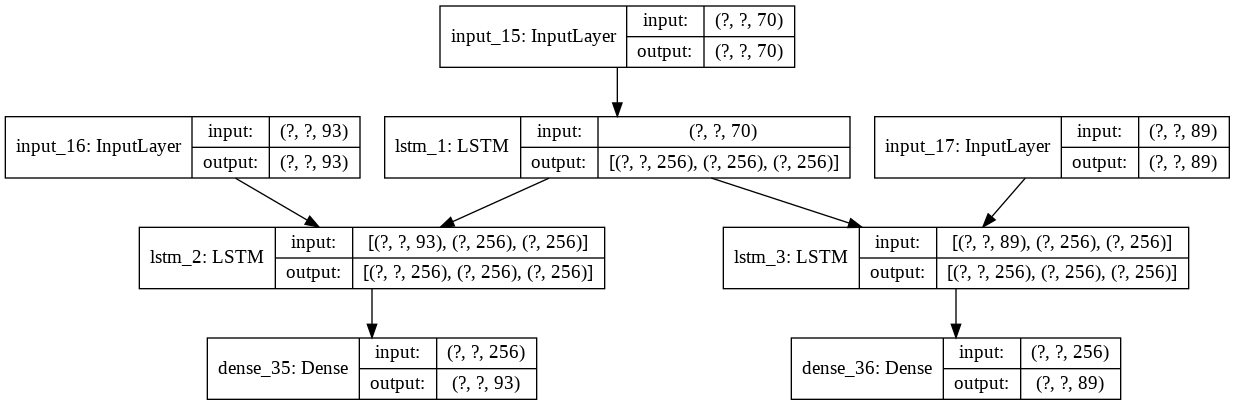

In [52]:
model.summary()
import tensorflow as tf
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)


In [53]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
french_decoder_outputs, state_h, state_c = french_decoder_lstm(
    french_decoder_inputs, initial_state=decoder_states_inputs)
french_decoder_states = [state_h, state_c]
french_decoder_outputs = french_decoder_dense(french_decoder_outputs)
french_decoder_model = Model(
    [french_decoder_inputs] + decoder_states_inputs,
    [french_decoder_outputs] + french_decoder_states)


farsi_decoder_outputs, state_h, state_c = farsi_decoder_lstm(
    farsi_decoder_inputs, initial_state=decoder_states_inputs)
farsi_decoder_states = [state_h, state_c]
farsi_decoder_outputs = farsi_decoder_dense(farsi_decoder_outputs)
farsi_decoder_model = Model(
    [farsi_decoder_inputs] + decoder_states_inputs,
    [farsi_decoder_outputs] + farsi_decoder_states)



# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in english_token_index.items())

reverse_french_target_char_index = dict(
    (i, char) for char, i in french_target_token_index.items())

reverse_farsi_target_char_index = dict(
    (i, char) for char, i in farsi_target_token_index.items())


def decode_sequence_to_french(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_french_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, french_target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = french_decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_french_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_french_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_french_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]


    return decoded_sentence


def decode_sequence_to_farsi(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_farsi_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, farsi_target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = farsi_decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_farsi_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_farsi_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_farsi_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]


    return decoded_sentence



for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = english_input_data[seq_index: seq_index + 1]
    decoded_french_sentence = decode_sequence_to_french(input_seq)
    decoded_farsi_sentence = decode_sequence_to_farsi(input_seq)
    print('-')
    print('Input sentence:', english_texts[seq_index])
    print('Decoded french sentence:', decoded_french_sentence)
    print('Decoded farsi sentence:', decoded_farsi_sentence)


-
Input sentence: Go.
Decoded french sentence: Ve l'est parte !

Decoded farsi sentence: برو بروان بخوان.

-
Input sentence: Hi.
Decoded french sentence: Arrête de toir !

Decoded farsi sentence: برا بین.

-
Input sentence: Hi.
Decoded french sentence: Arrête de toir !

Decoded farsi sentence: برا بین.

-
Input sentence: Run!
Decoded french sentence: Va chez vous parte !

Decoded farsi sentence: برو بروان بخوان.

-
Input sentence: Run!
Decoded french sentence: Va chez vous parte !

Decoded farsi sentence: برو بروان بخوان.

-
Input sentence: Who?
Decoded french sentence: Qui l'a partir ?

Decoded farsi sentence: آنها آن را دوست دارید؟

-
Input sentence: Wow!
Decoded french sentence: Ve l'est parte !

Decoded farsi sentence: به من باش.

-
Input sentence: Fire!
Decoded french sentence: Arrête de toim !

Decoded farsi sentence: به من به ما بلان کن.

-
Input sentence: Help!
Decoded french sentence: Sous parte !

Decoded farsi sentence: برو بروان.

-
Input sentence: Jump.
Decoded french sent

# 2. BERT and Word Sense Disambiguation

In computational linguistics, word-sense disambiguation (WSD) is an open problem concerned with identifying which sense of a word is used in a sentence. Imagine a bank of water, or a bank which accepts deposits. You can distinguish these two "banks" easily because you understand the context of the sentence which is used for it. What if we want to distinguish senses of a word automatically? You have learned about word embeddings and W2V from the [first assignment](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing). W2V extracts a unique vector that is a representation of that word. That is sufficiant we are going distinguish between two different words, such as "Hi" and "Bye"; but we cannot purely depend on it when we want to distinguish between a specific word with several senses.

Researchers have developed several methods for tackling this issue. One of these techniques named DeConf is proposed by your professor, Dr. Pilehvar. He tackled this problem by de-conflating the representations of words based on the deep knowledge it derives from a semantic network. You can read the complete paper [here](https://arxiv.org/abs/1608.01961). Besides, A full survey about WSD is available [here](https://www.researchgate.net/publication/220566219_Word_Sense_Disambiguation_A_Survey).

In this task, we are going to distinguish between two senses of the word (noun) "bat" using [BERT](https://arxiv.org/abs/1810.04805). BERT is a context-aware language representation model that can produce different vectors for a specific word according to the context of the sentence.

According to [Cambridge dictionary](https://dictionary.cambridge.org/dictionary/english/bat), "bat" has two meanings:
1. A specially shaped piece of wood used for hitting the ball in some games (cricket bat)

2. A small animal like a mouse with wings that flies at night (mammal bat)



We use two simple datasets for our task. First, cricketbat.txt, which contains few sentences referring to bat used in cricket sport, and second, vampirebat.txt, which contains few sentences referring to the mammal bird bat. These datasets are available in [this](https://github.com/omkar-dsd/mini_projects/tree/master/word_sense_disambiuation) repository, which is used for another WSD approach using [Wordnet](https://wordnet.princeton.edu/). The full explanation of WSD using this method is available [here](https://towardsdatascience.com/a-simple-word-sense-disambiguation-application-3ca645c56357).

In [54]:
!git clone https://github.com/omkar-dsd/mini_projects.git

# Download and load the datasets here. Then, separate and lower the sentences and insert them in a list.

Cloning into 'mini_projects'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [0]:
cricket_bat = open('/content/mini_projects/word_sense_disambiuation/cricketbat.txt').readlines()
vampire_bat = open('/content/mini_projects/word_sense_disambiuation/vampirebat.txt').readlines()
cricket_bat = list(map(str.lower,cricket_bat))
vampire_bat = list(map(str.lower,vampire_bat))


Now, we use BERT to encode words of these datasets. You can use [this](https://github.com/hanxiao/bert-as-service) repository to extract word embeddings of the sentences. Use BERT-Base, Uncased as your pre-trained BERT model. Then, insert the vectors of all words with root "bat" in another list for each dataset.

In [56]:
!pip install bert-serving-server  # server
!pip install bert-serving-client
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip
!unzip wwm_uncased_L-24_H-1024_A-16.zip
!ls

     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 1.1MB 33.9MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=969fe84ee64d24fb500d7b7e68c1bb486bcd3b6e3ed89df5c0cbd40d0d5ab9ef
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: pyzmq 17.0.0
    Uninstalling pyzmq-17.0.0:
      Successfully uninstalled pyzmq-17.0.0


--2019-12-29 10:28:24--  https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1248381879 (1.2G) [application/zip]
Saving to: ‘wwm_uncased_L-24_H-1024_A-16.zip’

wwm_uncased_L-24_H- 100%[===================>]   1.16G  67.6MB/s    in 20s     

2019-12-29 10:28:45 (58.9 MB/s) - ‘wwm_uncased_L-24_H-1024_A-16.zip’ saved [1248381879/1248381879]

Archive:  wwm_uncased_L-24_H-1024_A-16.zip
   creating: wwm_uncased_L-24_H-1024_A-16/
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.meta  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.data-00000-of-00001  
  inflating: wwm_uncased_L-24_H-1024_A-16/vocab.txt  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.index  
  inflating: wwm_uncased

In [57]:
# !unzip ./cased_L-24_H-1024_A-16.zip.3
# !htop
!ls

_about.txt  fa.txt	 mini_projects	sample_data
asg03	    fra-eng.zip  model.png	wwm_uncased_L-24_H-1024_A-16
downloads   fra.txt	 s2s.h5		wwm_uncased_L-24_H-1024_A-16.zip


In [0]:
# !bert-serving-start  -model_dir=./cased_L-24_H-1024_A-16 > out.file 2>&1 &
# !nohup bert-serving-start -pooling_strategy NONE -max_seq_len=1000 -model_dir=./cased_L-24_H-1024_A-16  > out.file 2>&1 & 

!nohup bert-serving-start  -pooling_strategy NONE -show_tokens_to_client -max_seq_len NONE  -model_dir=./wwm_uncased_L-24_H-1024_A-16 > out.file 2>&1 &
# !nohup bert-serving-start -model_dir=./cased_L-24_H-1024_A-16 > out.file 2>&1 &



In [59]:
!ls
!kill bert-serving-start

_about.txt   fra.txt	    sample_data
asg03	     mini_projects  wwm_uncased_L-24_H-1024_A-16
downloads    model.png	    wwm_uncased_L-24_H-1024_A-16.zip
fa.txt	     out.file
fra-eng.zip  s2s.h5
/bin/bash: line 0: kill: bert-serving-start: arguments must be process or job IDs


In [60]:
from bert_serving.client import BertClient
bc = BertClient()
print(bc.encode(['First do it', 'then do it right', 'then do it better']).shape)


(3, 6, 1024)


/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


In [61]:
# Use bert to extract the embeddings of "bat"s.
import numpy as np
a = bc.encode(cricket_bat, show_tokens=True)
vectors = a[0][0]
tokens = a[1][0]
cricket_bat_vectors = []
for i,token in enumerate(tokens):
  if 'bat' in token:
    cricket_bat_vectors.append(vectors[i])
all_cricket_bat_vectors = cricket_bat_vectors
cricket_bat_vectors = np.sum(np.array(cricket_bat_vectors)/len(cricket_bat_vectors),axis=0)
print(cricket_bat_vectors.shape)

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


(1024,)


In [62]:
a = bc.encode(vampire_bat, show_tokens=True)
import numpy as np
vectors = a[0][0]
tokens = a[1][0]
vampire_bat_vectors = []
for i,token in enumerate(tokens):
  if 'bat' in token:
    vampire_bat_vectors.append(vectors[i])
all_vampire_bat_vectors = vampire_bat_vectors
vampire_bat_vectors = np.sum(np.array(vampire_bat_vectors)/len(vampire_bat_vectors),axis=0)
print(vampire_bat_vectors.shape)

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


(1024,)


In [0]:
from numpy import linalg as LA
def check_bat(sentence):
  a = bc.encode([sentence], show_tokens=True)
  vectors = a[0][0]
  tokens = a[1][0]
  bat_vectors = []
  for i,token in enumerate(tokens):
    if 'bat' in token:
      bat_vectors.append(vectors[i])
  bat_vectors = np.sum(np.array(bat_vectors)/len(bat_vectors),axis=0)
  bat_diff_vampire = LA.norm((bat_vectors - vampire_bat_vectors))
  bat_diff_cricket = LA.norm((bat_vectors - cricket_bat_vectors))
  print(bat_diff_vampire)
  print(bat_diff_cricket)
  if(bat_diff_cricket > bat_diff_vampire):
    return bat_vectors,"mammal bat"
  else:
    return bat_vectors,"cricket bat"



Now, you need to find a specific embedding for each sense of the "bat". A simple approach is averaging all "bat" vectors of each document. Then, you should calculate the distance between the BERT embedding of "bat" in our test cases with your document "bat"s. 

Hint: [This](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) function may be useful.

In [64]:
test_cases = ["bats are mammals","bats breed","bats are used to play cricket", "which bat has handle?","bats can fly"]
test_labels = ["mammal bat","mammal bat","cricket bat","cricket bat","mammal bat"]

your_labels = [x[1] for x in list(map(check_bat,test_cases))]
test_vector = [x[0] for x in list(map(check_bat,test_cases))]
 
print(your_labels)
#fill your labels with the "bat" with minimum distance to the test case

assert test_labels==your_labels

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


15.54059
19.12995
21.170086
21.637732
20.440533
16.299915
21.35244
18.051403
18.767963
19.884918
15.54059
19.12995
21.170086
21.637732
20.440533
16.299915
21.35244
18.051403
18.767963
19.884918
['mammal bat', 'mammal bat', 'cricket bat', 'cricket bat', 'mammal bat']


Hmm... It makes sense. Let's see what you produced. You should use [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to compress the 768 dimensions of BERT embeddings into just 2 dimensions. Then, use matplotlib to visualize them.

(1024,)
[0.016137   0.22427905]
TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)
16


No handles with labels found to put in legend.


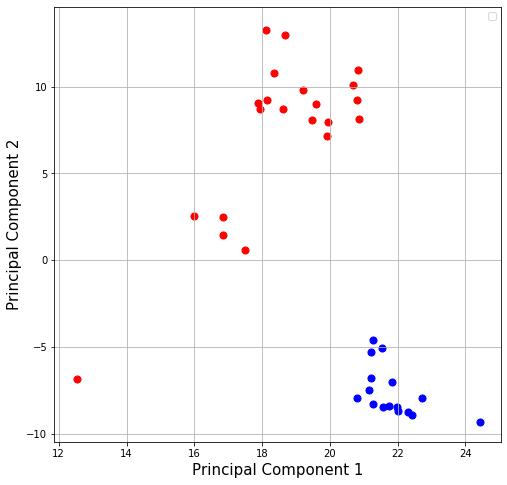

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD

# make a list of embeddings like this: [ALL_CRICKET_BAT_EMBEDDINGS,ALL_MAMMAL_BAT_EMBEDDINGS,AVERAGE_CRICKET_BAT_EMBEDDING,AVERAGE_MAMMAL_BAT_EMBEDDING,ALL_TEST_BAT_EMBEDDINS]
vec_all = all_cricket_bat_vectors+all_vampire_bat_vectors+ [cricket_bat_vectors]+[vampire_bat_vectors]+test_vector
print(np.array(vec_all[2]).shape)
pca = TruncatedSVD(n_components=2)
principalComponents = pca.fit_transform(vec_all)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data=principalComponents
                           , columns=['principal component 1', 'principal component 2'])
print(pca)


# make a colors list. use "b" for CRICKET_BATs, "r" for MAMMAL_BATs
colors =[]
colors += ["b"] * len(all_cricket_bat_vectors)
colors += ["r"] * len(all_vampire_bat_vectors)
print(len(all_cricket_bat_vectors))
#extract pc1 and pc2 for document bats
pc1_document=principalDf.get('principal component 1').tolist()[:-7]
pc2_document=principalDf.get('principal component 2').tolist()[:-7]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_document,pc2_document, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

It seems that despite this considerable compression, the clusters are distinguishable. Now, for the last part, visualize the average vectors and the test case vectors.

No handles with labels found to put in legend.


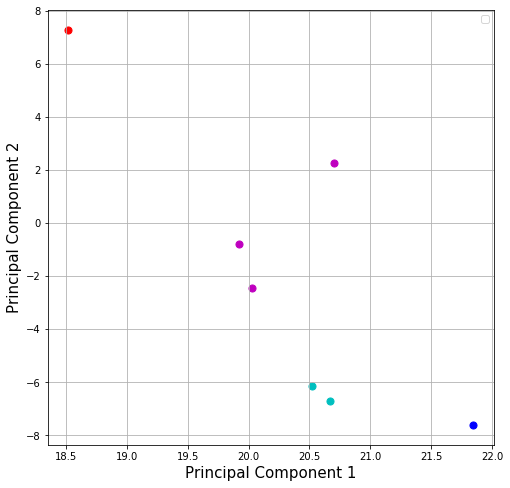

In [66]:
#extract pc1 and pc2 for average and test bats
pc1_remainings=principalDf.get('principal component 1').tolist()[-7:]
pc2_remainings=principalDf.get('principal component 2').tolist()[-7:]

colors =["b","r","m","m","c","c","m"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_remainings,pc2_remainings, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg03__xx__xx.zip`) and submit it via [https://forms.gle/W8AMoNffho8TQLB87](https://forms.gle/W8AMoNffho8TQLB87).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_03'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg03__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 03 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: iamdanialkamali
github.com password for iamdanialkamali (never stored): 
.login	iamdanialkamali
.id	25593739
.node_id	MDQ6VXNlcjI1NTkzNzM5
.avatar_url	https://avatars0.githubusercontent.com/u/25593739?v=4
.gravatar_id	
.url	https://api.github.com/users/iamdanialkamali
.html_url	https://github.com/iamdanialkamali
.followers_url	https://api.github.com/users/iamdanialkamali/followers
.following_url	https://api.github.com/users/iamdanialkamali/following{/other_user}
.gists_url	https://api.github.com/users/iamdanialkamali/gists{/gist_id}
.starred_url	https://api.github.com/users/iamdanialkamali/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/iamdanialkamali/subscriptions
.organizations_url	https://api.github.com/users/iamdanialkamali/orgs
.repos_url	https://api.github.com/users/iamdanialkamali/repos
.events_url	https://api.github.com/users/iamdanialkamali/events{/privacy}
.received_events_url	https://api.github.com/users/iamdanialkamali/received_e

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg03_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.